# Exam project: Dynamical friction

The aim of this work is to study the dynamical friction inside an elliptical galaxy, generated according to a Hernquist distribution, with a SMBH at the center of it, and a BH as test particle for the dynamical friction.

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy

%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['font.size']='14'
matplotlib.rcParams['figure.figsize']=[10,5]

## General Values of the problem 

We make the following choice:

$$ 1 \, r_{iu} = 1\,  kpc = 3 \cdot 10^{21} \,cm $$
$$ 1 \, m_{iu} = 10^{8}\,  M\odot = 2 \cdot 10^{41}\, g $$
$$ 1 \, v_{iu} = 20.55 \, km/s $$

In [21]:
N_H = 10000 # number of particle of the Hernquist distribution
N = N_H + 1 # number of particle included the 'test' BH 
N_tot = N +1 # number of particle included the 'test' BH and the central BH

t_init = 0 # initial time
M = 100 # total mass of the Hernquist system 10^10 Msun

a = 2 # Scale parameter, 2 kpc 

mass = M/N_H # mass of the single particle

M_BH_central = 10 # mass of the central SMBH 10^9 Msun
M_BH_df = 5 # BH where to study the dynamical friction

m = M/N_H * np.ones(N_tot) # adding the central BH
m[0] = 0*m[0] + M_BH_central 
m[1] = 0*m[0] + M_BH_df 


## Generating the Hernquist distribution

Looking to the Hernquist distribution 
$$ \rho ( R) = \frac{M_{tot}}{2\pi}  \frac{a}{ r (r+a)^3}; \quad M(r) = M_{tot}\left(\frac{r}{ r + a}\right)^2;$$ 

Integrating: 
$$ p(r) = \frac{4\pi r^2 \rho(r)}{M_{tot}}  = \frac{2ar}{(r+a)^3}; \quad P(R) = \frac{M(R)}{M_{tot}}=\left(\frac{R}{ R + a}\right)^2.$$


Inverting the relation for $P$: 
$$
\begin{cases}
    R(P) = a \frac{\sqrt{P}}{1-\sqrt{P}} && 0 \le P \le 1 \\ \\
    \varphi = \tilde{\varphi} && 0 \le \tilde{\varphi} \le 2 \pi \\ \\
    \theta = \arccos(1-2 u) &&  0 \le u \le 1 
\end{cases}
$$

#### Sampling on radial coordinate with the inverse transform and velocities with rejection sampling

Hernquist's asrticle: https://ui.adsabs.harvard.edu/abs/1990ApJ...356..359H/abstract

In [22]:
def p_r(q):
    return 2*a*q/((q+a)**3)

def p_θ(q):
    return np.sin(q)/2

def p_ϕ():
    return 1/(2*np.pi)


#-------------

def R_P(P):
    return a * (P**0.5) / (1 - P**0.5)

def r_sample():
    u = np.random.uniform(0,1,N)
    return R_P(u)

def θ_sample():
    u = np.random.uniform(0,1, N)
    return np.arccos(1-2*u)

def ϕ_sample():
    return np.random.uniform(0, 2*np.pi, N)


#-----------------------------------

r = r_sample()
θ = θ_sample()
ϕ = ϕ_sample()
    


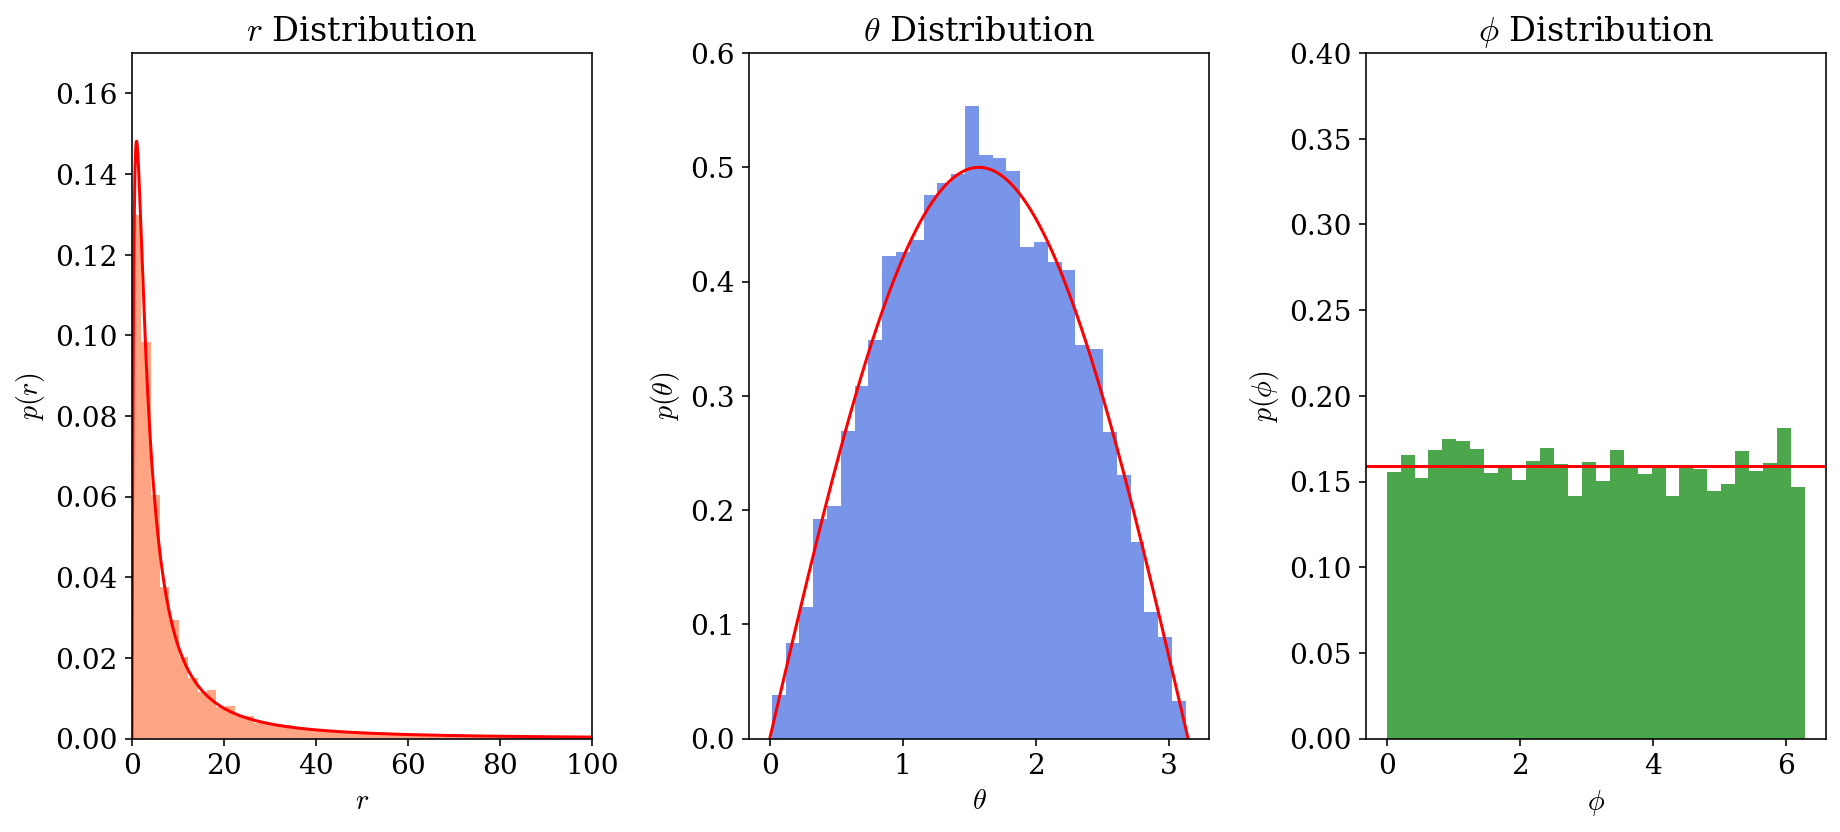

In [23]:
# Plots of the space values distributions

fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(13, 6)) 

q1 = np.linspace(0,100,100000)
bins = np.linspace(0, 100, 50) #for visualisation
ax[0].hist(r, bins = bins, color = 'coral', density=True, alpha=.7, lw=0) 
ax[0].plot(q1, p_r(q1),color='red')
ax[0].set(xlim=(0,100), ylim = (0,0.17), title = fr'$r$ Distribution', xlabel = r'$r$', ylabel=r'$p(r)$') 

q2 = np.linspace(0,np.pi,100000)
ax[1].hist(θ, bins = 30, color = 'royalblue', density=True, alpha=.7, lw=0)
ax[1].plot(q2, p_θ(q2),color='red')
ax[1].set(ylim = (0,0.6), title = fr'$\theta$ Distribution', xlabel = r'$\theta$', ylabel=r'$p(\theta)$')


q3 = np.linspace(0,2+np.pi,100000)

ax[2].hist(ϕ, bins = 30, color = 'green', density=True, alpha=.7, lw=0)
ax[2].axhline(p_ϕ(),color='red')
ax[2].set(ylim = (0,0.4), title = fr'$\phi$ Distribution', xlabel = r'$\phi$', ylabel=r'$p(\phi)$')


plt.show()

We wanyt to study the dynamical friction on the 'test' BH, we want to impose an initial radial distance from the central BH

$$
r_{BH  test} > 3 a,
$$

otherwise its dynamic will be dominated by the interaction with the central BH and we would not be able to study the dynamical friction

In [24]:
r_decrease = np.sort(r)[::-1] # we sort them to be consistet with the generation of velocities

# Extracting the index of the 'test' BH
index = np.random.randint(np.argmax(r_decrease > 3*a), np.argmax(r_decrease < 7*a))  

x = r_decrease * np.cos(ϕ) * np.sin(θ)
y = r_decrease * np.sin(ϕ) * np.sin(θ)
z = r_decrease * np.cos(θ)

# adding the SMBH at the center (0,0,0)

x = np.concatenate(([0], x))
y = np.concatenate(([0], y))
z = np.concatenate(([0], z))

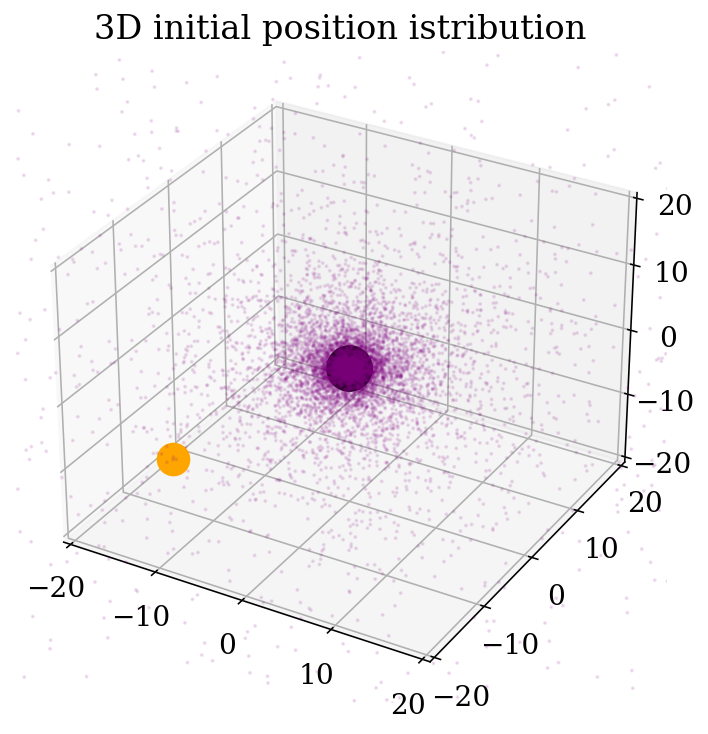

In [25]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d') 
ax.scatter(x, y, z, c = 'purple', s=1, alpha=0.1) 
ax.scatter(x[0], y[0], z[0], c = 'black', s= 0.5*m[0]/m[2])
ax.scatter(x[index+1], y[index+1], z[index+1], c = 'orange', s= 0.5*m[1]/m[2]) 
ax.set_aspect('auto')
ax.set_title('3D initial position istribution')


ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(-20,20)
plt.show();

In [26]:
print('r and (x,y,z) of the test BH:', r[index], x[index+1], y[index+1], z[index+1])

r and (x,y,z) of the test BH: 2.1496589810729647 -10.615962370590609 -16.139960625192302 -7.115235866223694


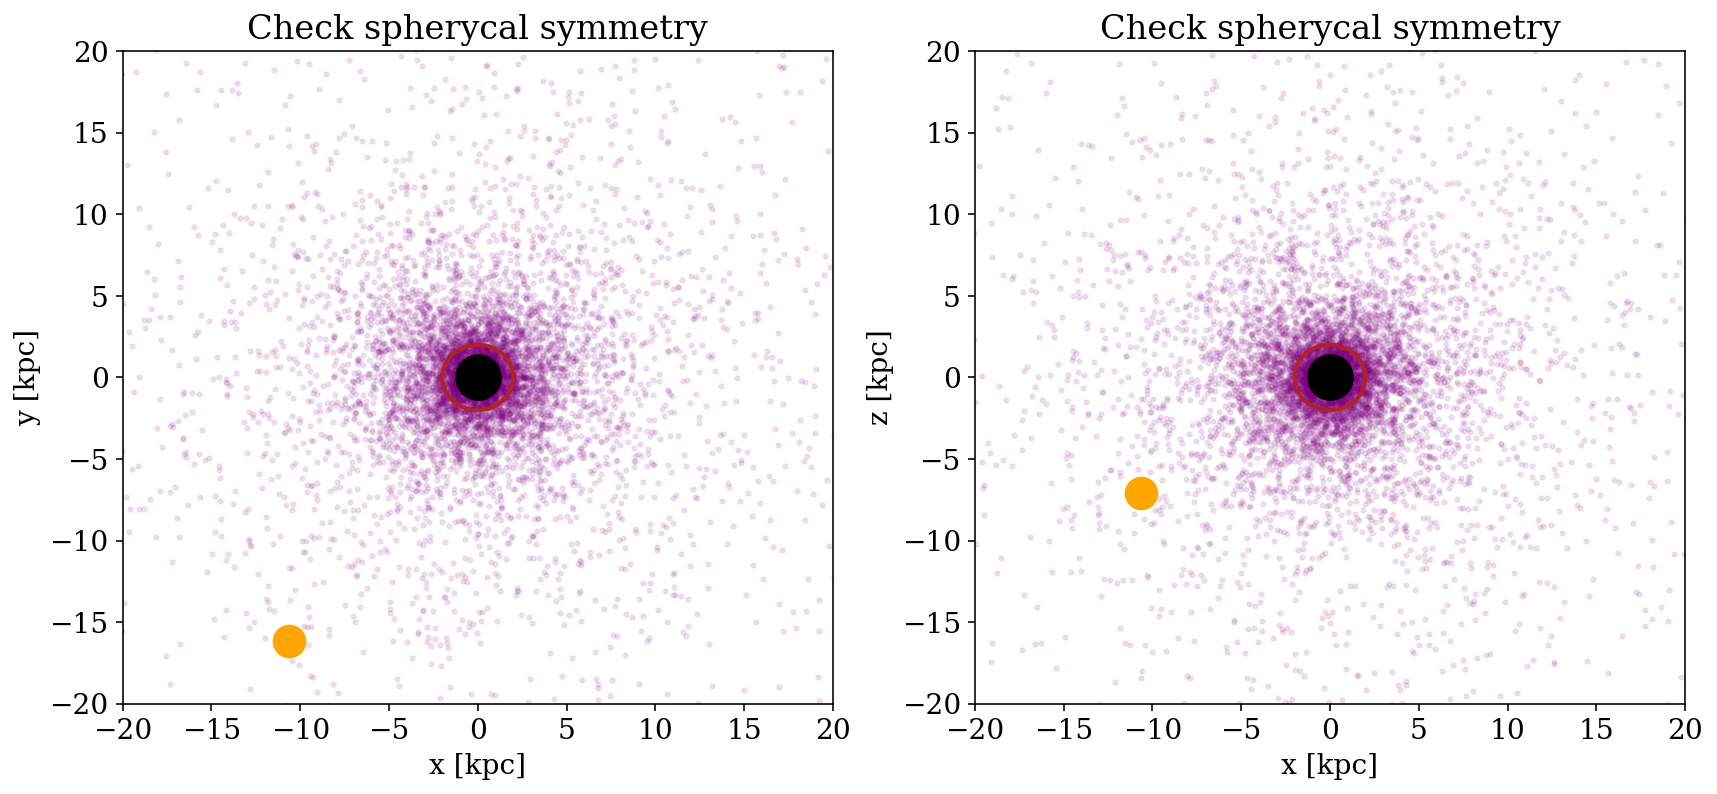

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

draw_circle_xy = plt.Circle((0,0), a,color='firebrick',fill=False,lw=2)

ax[0].scatter(x,y, c = 'purple', s=5, alpha=0.1) 
ax[0].scatter(x[0], y[0], c = 'black', s= 0.5*m[0]/m[2]) 
ax[0].scatter(x[index+1], y[index+1], c = 'orange', s= 0.5*m[1]/m[2]) 
ax[0].set_title('Check spherycal symmetry')
ax[0].set_xlabel('x [kpc]')
ax[0].set_ylabel('y [kpc]')
ax[0].set_ylim(-20,20)
ax[0].set_xlim(-20,20)
ax[0].add_artist(draw_circle_xy)

draw_circle_xz = plt.Circle((0,0), a,color='firebrick',fill=False,lw=2)

ax[1].scatter(x,z, c = 'purple', s=5, alpha=0.1)
ax[1].scatter(x[0], z[0], c = 'black', s= 0.5*m[0]/m[2]) 
ax[1].scatter(x[index+1], z[index+1], c = 'orange', s= 0.5*m[1]/m[2]) 
ax[1].set_title('Check spherycal symmetry')
ax[1].set_xlabel('x [kpc]')
ax[1].set_ylabel('z [kpc]')
ax[1].set_ylim(-20,20)
ax[1].set_xlim(-20,20)
ax[1].add_artist(draw_circle_xz)

## Generating velocities

https://arxiv.org/pdf/astro-ph/9309044

### Hernquist distribution
We are working with $ G = 1 $ and $ M_{tot} \neq 0 $ , but for the discusssion below we always write the constant for completness. 

The gravitational potential $ \Phi(r) $ is given by : 

$$ \Phi(r) = - \int_r^\infty \frac{M \Phi(r') \, dr'}{{r'}^2}  = -\frac{G M_{tot}}{a+r} \quad . $$ 

We assume that the phase-space distribution function (DF) depends only on energy, which implies that the velocity-dispersion tensor is isotropic. 

Jeans' theorem ensures that any DF that depends only on energy is a steady-state solution of the collisionless Boltzmann equation. $ f \geq 0 $ is the mass per unit volume of phase space.

Let's define some variables: 
- conserved energy (per unit mass) and relative potential $  E = \Phi + \frac{1}{2} v^2, \quad  \Psi = - \Phi + \Phi_{0} ,$
- relative energy (per unit mass) $ \epsilon \equiv -E + \Phi_{0} = \Psi - \frac{1}{2} v^2 $ .

(these quantities are defned so that we work with non-negative variables).

The density $ \rho $ is given by:

$$ \rho = 2^{5/2} \pi \int_0^{\Psi} f(\epsilon) \, (\psi -\epsilon)^{1/2} \, d\epsilon, $$ 

inverting ad obtaining the Eddington's formula

$$ f(\epsilon) = \frac{1}{2^{3/2} \pi^2} \frac{d}{d\epsilon} \left( \int_0^\epsilon \frac{d\rho}{d\psi} \frac{1}{(\epsilon-\psi)^{1/2}} d\psi \right) = \frac{1}{2^{3/2} \pi^2} \int_0^{\epsilon} \frac{d^2 \rho}{d \psi^2} \frac{1}{(\epsilon-\psi)^{1/2}}d\psi. $$ 



### Hernquist distribution with a central BH 
We modified our system including a BH a the center of it.
$$ \Phi^*(r) \equiv \Phi(r)  - \frac{GM_{BH}}{r},$$

therefore 

$$
f(\epsilon) = \frac{1}{2^{3/2} \pi^2} \frac{d}{d\epsilon} \left( \int_0^\epsilon \frac{d\rho}{d\Psi^*} \frac{1}{(\epsilon-\Psi^*)^{1/2}} d\Psi^* \right). 
$$ 



In [28]:
# Potentials

def Φ_H(r): 
    return -M/(r+a)

def Φ_BH(r):
    return -M_BH_central/r

def Φ_tot(r):
    return Φ_H(r) + Φ_BH(r)

#density
def ρ_H(r):
    return M/(2*np.pi) * a/r * 1/(r+a)**3

We do a check of the density distribution, computing $ \rho = (N_{particle} \cdot mass)/dV $ 



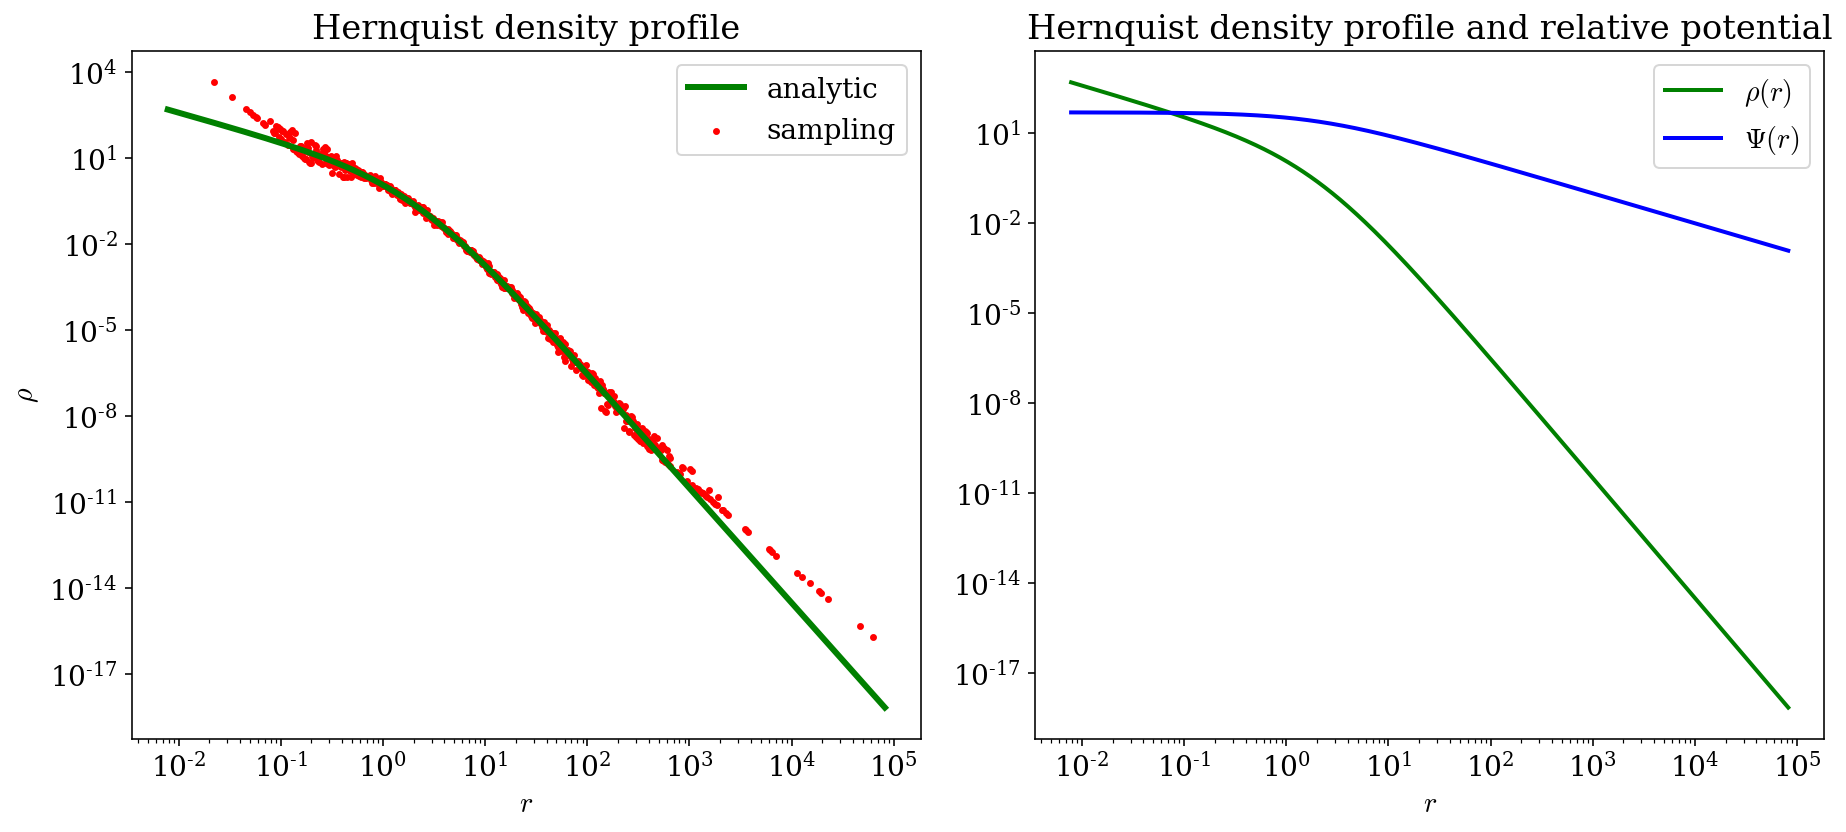

In [29]:
def count_particle(r_g, r_H):
    num_part = []
    for i in range(len(r_g)-1):
        left  = r_g[i]
        right = r_g[i+1]
        n = len([el for el in r_H if (left<el<right)])
        num_part.append(n)
    return num_part


r_grid   = np.geomspace(min(r),max(r),1000)
dV = np.array([(4*np.pi*r_grid[i+1]**3)/3 - (4*np.pi*r_grid[i]**3)/3 for i in range(len(r_grid)-1)])
n_shell = np.array(count_particle(r_grid, np.sort(r)))
density = (n_shell/dV)*mass

density_analytic =  ρ_H(r_grid)

fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(13, 6)) 

ax[0].plot(r_grid, density_analytic, color = 'green', label='analytic', linewidth = 3)
ax[0].scatter(r_grid[1:], density, color = 'red', label='sampling', s = 6)

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\rho$')
ax[0].set_title('Hernquist density profile')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()


ax[1].plot(r_grid, density_analytic, color = 'green', label=r'$\rho(r)$', linewidth = 2)
ax[1].plot(r_grid,  -Φ_H(r_grid), color = 'blue', label=r'$\Psi(r)$', linewidth = 2)

ax[1].set_xlabel(r'$r$')
ax[1].set_title('Hernquist density profile and relative potential')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()

In order to sample the velocities, we need to computer first the DF $ f(\epsilon) $, since there is not an analytic ssolution for our system, Hernquist + a central BH, we proceed numerically.

Starting from the integral 

$$
J(\epsilon) =  \int_0^\epsilon \frac{d\rho}{d\Psi^*} \frac{1}{(\epsilon-\Psi^*)^{1/2}} d\Psi^*  \,,
$$

The extreme of integration $\varepsilon$ runs between $0$ and the maximum value of the potential (that is given by the value of the relative potential at the centre of the distribution). 

To compute numerically the integral we build an array of $\varepsilon$ over which valuate the integral: $\varepsilon \in [0,\Psi^*(r=0)]$. 

In order to have the arrays running in the same radial direction as $\varepsilon$ (from $r=\infty$ to $r=0$), we order the $\rho$ and $\psi$ array according to this.



In [30]:
# define the extreme of integration for each particle according to its radius (the max value is psi)
eps_integral = -Φ_tot(r_decrease)  

# define the approximation of the integral
alpha = 0.999999999
integral = np.zeros(N)

for i in range(N):
    N_int = 100
    
    r_ = np.linspace(r_decrease[0]+1,r_decrease[i],N_int)
    Ψ = -Φ_tot(r_)
    ρ = ρ_H(r_)
    
    drho_dpsi = np.gradient(ρ)/np.gradient(Ψ)
    
    integral[i] = np.trapz(drho_dpsi/(np.sqrt(eps_integral[i]-alpha*Ψ)),Ψ)
    

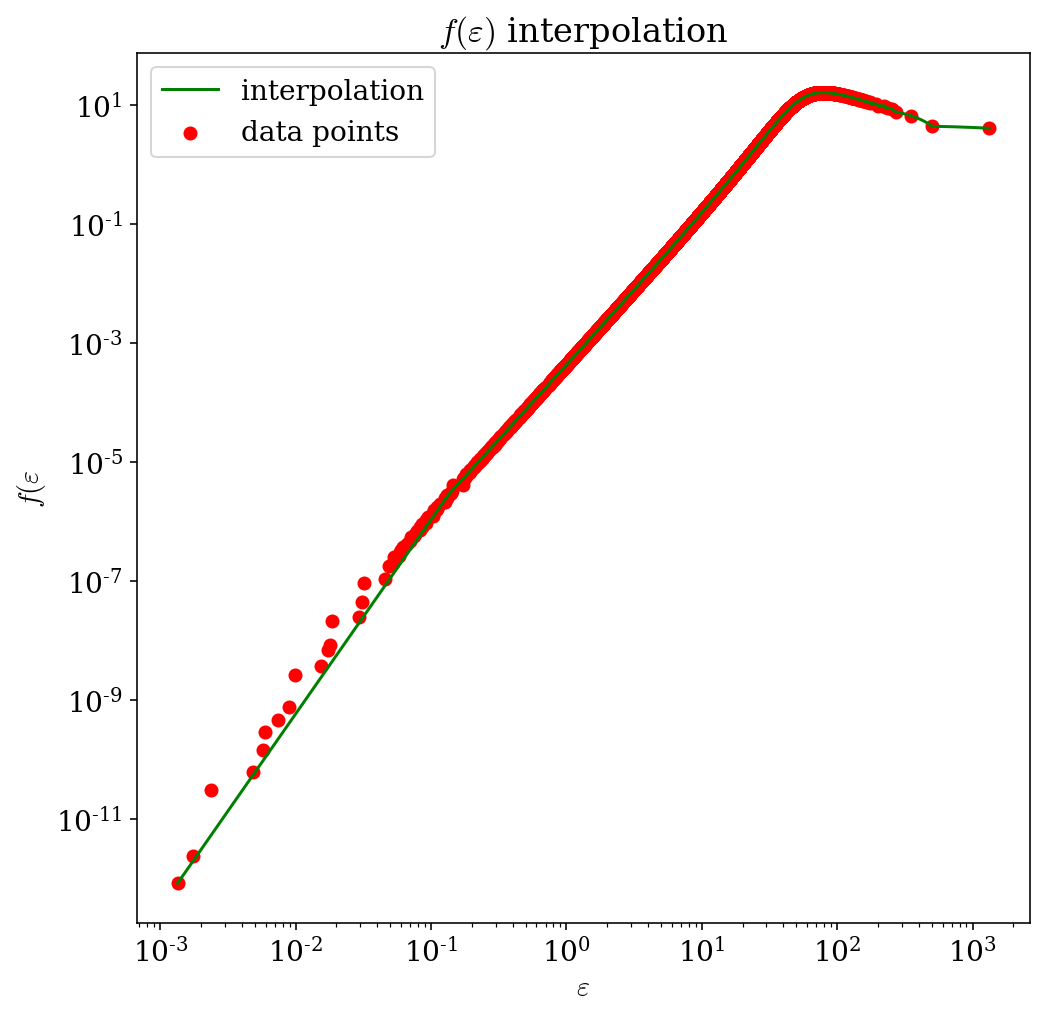

In [31]:
f_eps = 1/(np.sqrt(8)*np.pi**2)*np.gradient(integral)/np.gradient(eps_integral)

# interpolation of the f(eps)
f_eps_interpolate = scipy.interpolate.interp1d(eps_integral,f_eps,kind='linear')

eps_grid = np.linspace(min(eps_integral),max(eps_integral),N)

fig = plt.figure(figsize=(8,8))

plt.plot(eps_grid,f_eps_interpolate(eps_grid),color='green',label='interpolation')
plt.scatter(eps_integral,f_eps,label='data points', color = 'red')
plt.loglog()
plt.title(r'$f(\varepsilon)$ interpolation')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$f(\varepsilon$')

plt.legend()

In order to do determine the velocity distribution numerically, we need to integrate the distribution function over the velocity space:

$$ F(\varepsilon) = \int f(\varepsilon)d^3v $$

but under the assumption of isotropic distribution of velocities, the integral becomes:

$$ F(\varepsilon) = 4\pi \int_0^v f(\varepsilon) v^2 dv $$

From the definition of $\varepsilon = \psi - \frac{v^2}{2}$, we can write:

$$ v= \sqrt{2(\psi - \varepsilon)} $$ 

So the integral becomes:

$$ F(\varepsilon) = 4 \pi \int_0^{\psi} d\varepsilon  f(\varepsilon) \sqrt{2(\psi - \varepsilon)}   $$

Once we have computed numerically the integral for $F(\varepsilon)$ we can think to invert it to get the velocity distribution. The first step to achieve this goal is to normalize the integral:

$$ F_{norm}(\varepsilon) = \frac{F(\varepsilon)}{max(F)}$$

In this way this $ F_{norm}(\varepsilon)$ is a quantity within $(0,1)$. As already discussed, $\varepsilon = \psi - \frac{v^2}{2}$ and therefore the sampliing of the velocity distribution is not strightforward, since for each radius $\varepsilon$ runs from $0$ to $\psi(r)$. 

We adopt the **inverse sampling** method: we sample some values $ u $ from a uniform distribution $\mathcal{U}(0, 1) $
and find which is the value of $\varepsilon$ that minimizes $ | F(\epsilon) - u | $ . In this way we have fixed both $\psi$ and $\varepsilon$ and we are able to extract the velocity distribution.

In [32]:
N_F = 100
v_H = np.zeros(N)
psi_F = -Φ_tot(r_decrease)  
F_eps = np.zeros(N)
eps_distr = np.zeros(N)
for k in tqdm(range(N)):
    # define the value of psi at a given radius
    epsilon_F = np.linspace(min(eps_integral),psi_F[k],N_F) # define eps running in (0,psi(r))
    integral_F = np.empty(N_F)
    
    f_eps_j = f_eps_interpolate(epsilon_F) # evaluating the distribution function
    for i in range(N_F): # compute the numerical integral of F for each epsilon
        integral_F[i] = np.trapz(4*np.pi * np.sqrt(2*(psi_F[k] - epsilon_F[epsilon_F<=epsilon_F[i]])) *  f_eps_j[epsilon_F<=epsilon_F[i]],epsilon_F[epsilon_F<=epsilon_F[i]])
    
    
    if(k == 0):   
        eps_distr[0] = 0
        v_H[0] = 0
        F_eps[0] += 0
    else:
        F_norm = integral_F/max(integral_F)  # F_norm is whithin (0,1)        
        inv_interp_F = scipy.interpolate.interp1d(F_norm,epsilon_F,kind='linear')
    
        F_sample = np.random.uniform(0,1)    # to sample the correct eps
        eps_sample = inv_interp_F(F_sample)  # to find the epsilon giving the value of F
        eps_distr[k] = eps_sample
        v_H[k] = np.sqrt(2*(psi_F[k]-eps_sample))
    
        F_eps[k] += integral_F[-1]

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:49<00:00, 200.19it/s]


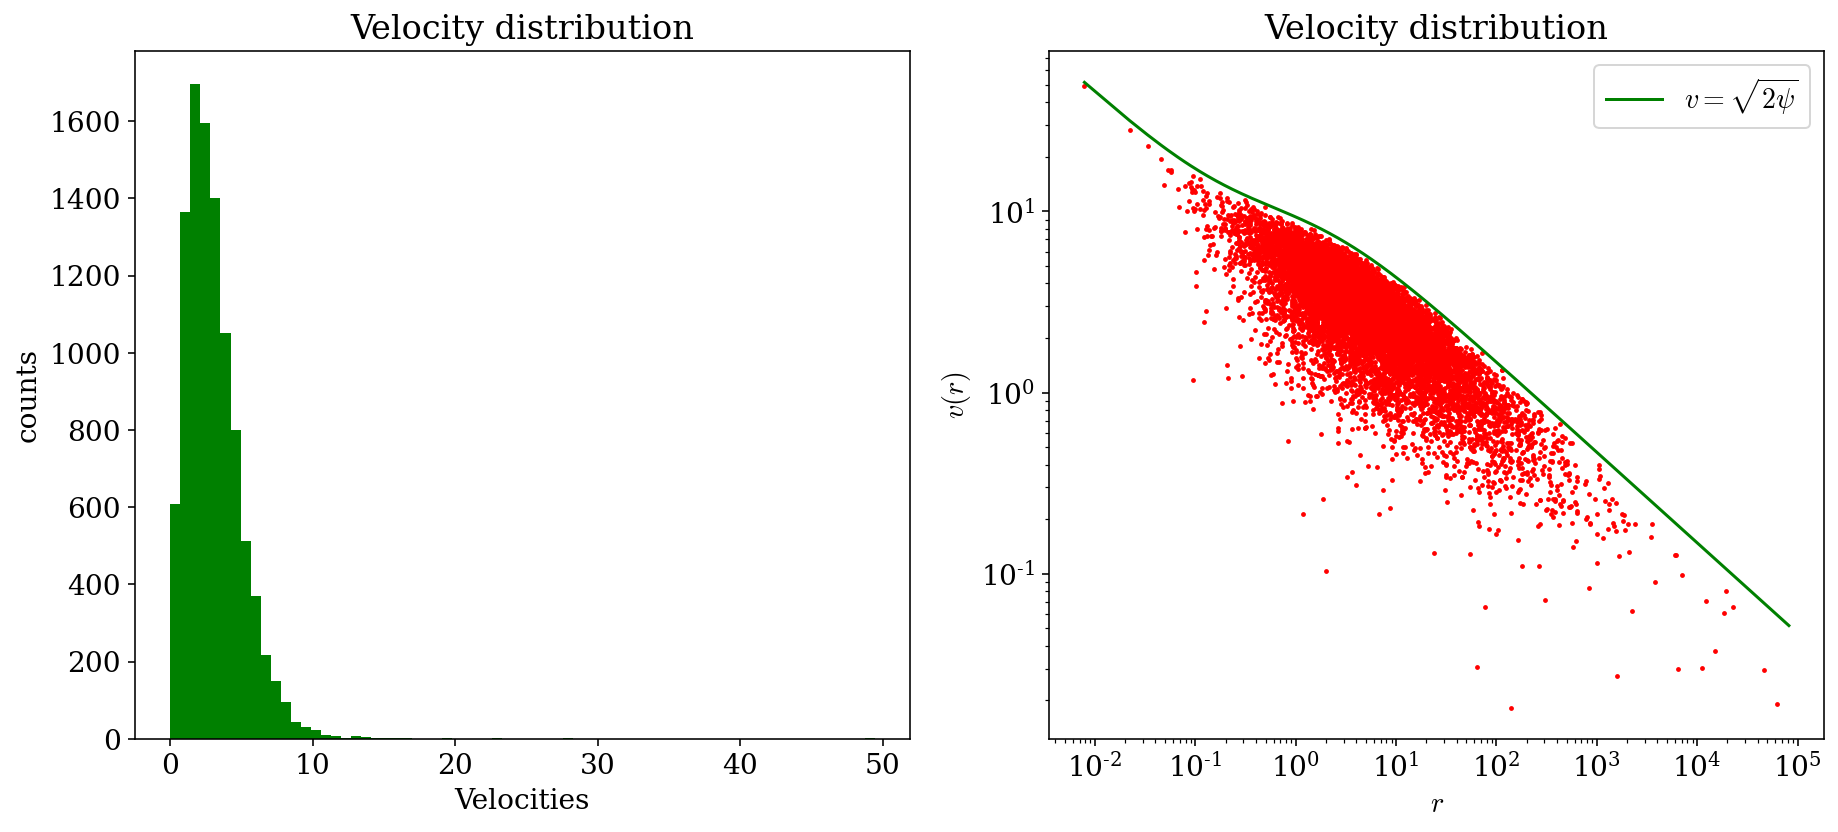

In [33]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(13, 6)) 

ax[0].hist(v_H,bins=70, color = 'green')

ax[0].set_xlabel('Velocities')
ax[0].set_ylabel('counts')
ax[0].set_title('Velocity distribution')



ax[1].plot(r_decrease,np.sqrt(2*abs(Φ_tot(r_decrease))),color='green',label=r'$v=\sqrt{2\psi}$')
ax[1].scatter(r_decrease,v_H,s=2, color = 'red')

ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$v(r)$')
ax[1].set_title('Velocity distribution')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()



In [34]:
θ_2 = θ_sample()
ϕ_2 = ϕ_sample()

v_x = v_H * np.sin(θ_2) * np.cos(ϕ_2)
v_y = v_H * np.sin(θ_2) * np.sin(ϕ_2)
v_z = v_H * np.cos(θ_2)

# adding the SMBH with v=(0,0,0)

v_x = np.concatenate(([0], v_x))
v_y = np.concatenate(([0], v_y))
v_z = np.concatenate(([0], v_z))

In [35]:
print('(vx,vy,vz) of the BH_df:', v_x[index+1], v_y[index+1], v_z[index+1])

(vx,vy,vz) of the BH_df: -1.8567782122491499 -0.10630185842473301 -0.7716232775568563


In [36]:
# For the seek of semplicity we put in the second position, index = 1 the 'test' BH

x[1], x[index+1] = x[index+1], x[1]
y[1], y[index+1] = y[index+1], y[1]
z[1], z[index+1] = z[index+1], z[1]

v_x[1], v_x[index+1] = v_x[index+1], v_x[1]
v_y[1], v_y[index+1] = v_y[index+1], v_y[1]
v_z[1], v_z[index+1] = v_z[index+1], v_z[1]

In [37]:
print(x[0],y[0],z[0])
print(v_x[0],v_y[0],v_z[0])

0.0 0.0 0.0
0.0 0.0 0.0


## Input file

In [38]:
dim = 3

with open ('initial_conditions_N10000_a3.txt', 'w+') as f:
    f.write(str(N_tot) +'\n')
    f.write(str(dim) + '\n')
    f.write(str(t_init)+'\n')
    for m_i in m:
        f.write(f'{m_i}' + '\n')
    for i in range(N_tot):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    for j in range(N_tot):
        f.write(f'{v_x[j]} {v_y[j]} {v_z[j]}' + '\n')
    
f.close()



## Parameters for the simulations 

In [39]:
avg_rho = (ρ_H(a)) # to compute the dynamical time

print('rho_a =',avg_rho)

# initialize treecode parameters

theta_tc = 0.1
T_dyn = np.sqrt((3*np.pi)/(16*avg_rho))

t_stop = 10*T_dyn
t_step = 0.01*T_dyn
t_out = 0.1*T_dyn
eps = (4/3*np.pi*a**3/len(np.where(np.sort(r)<a)[0]))**(1/3)*10**(-2)
print('theoretical eps:',eps)
eps = 0.3

sigma_vz = np.std(v_z[1:][r_decrease<a])
infl_radius = M_BH_central/(sigma_vz**2)

print('radius of 10% of the total mass (IU):',R_P(0.1))
print('scale radius (IU):',a)
print('BH influence radius:',infl_radius)
print('T_dyn =',T_dyn)
print('theta = ',theta_tc)
print('t_step = ',t_step)
print('t_out = ',t_out)
print('t_stop = ',t_stop)
print('epsilon = ',eps)

rho_a = 0.24867959858108646
theoretical eps: 0.0023764025951767877
radius of 10% of the total mass (IU): 0.9249505911485288
scale radius (IU): 2
BH influence radius: 0.9255295114151054
T_dyn = 1.539059796194237
theta =  0.1
t_step =  0.01539059796194237
t_out =  0.1539059796194237
t_stop =  15.390597961942369
epsilon =  0.3
